# 단어 표현(Word Representation)

컴퓨터는 텍스트뿐만 아니라 모든 값을 읽을 때 이진화된 값으로 받아들인다.
예를 들어 "언어"라는 텍스트를 컴퓨터가 인식한다면 다음과 같은 형태로 입력된다.

- '언': 1100010110111000
- '어': 1100010110110100

두 글자를 위와 같이 이진화된 값으로 인식하는데, 자연어 처리에 이러한 방식을 그대로 사용하기에는 문제가 있다.
문자를 이진화한 값의 경우 언어적인 특성이 전혀 없이 컴퓨터가 문자를 인식하기 위해 만들어진 값이므로 자연어 처리를 위해 만드는 모델에 적용하기에는 부적합하다.

이를 위한 것이 "단어 표현" 분야다.
텍스트를 자연어 처리를 위한 도멜에 적용할 수 있게 언어적인 특성을 반영해서 단어를 수치화하는 방법을 찾는 것이다.
그리고 이렇게 단어를 수치화할 때 단어를 주로 벡터로 표현한다.
따라서 단어 표현은 "단어 임베딩" 또는 "단어 벡터"로 표현하기도 한다.

## 원-핫 인코딩(one-hot encoding)

단어를 표현하는 가장 기본적인 방법은 원-핫 인코딩 방식이다.
단어를 하나의 벡터(vector)로 표현하는 방법인데, 각 값은 0 혹은 1만 갖는다.
즉, 각 단어는 0과 1 값만 가지는 벡터로 표현되는데, 이름에서 알 수 있는 벡터 값 가운데 하나만 1이라는 값을 가지고 나머지는 모두 0값을 가지는 방식이다.
여기서 1이 되는 것은 각 단어가 어떤 단어인지 알려주는 인덱스가 된다.

방법 자체가 매우 간단하고 이해하기도 쉽다는 장점이 있다.
하지만 이 방식은 실제로 자연어 처리 문제를 해결할 때 수십만, 수백만개가 넘는 단어를 표현할 경우 각 단어 벡터의 크기가 너무 커지기때문에 공간을 많이 사용하고, 큰 공감에 비해 실제 사용하는 값은 1이되는 값 하나뿐이므로 매우 비효율적이다.
또 다른 문제점은 이러한 표현 방식은 단순히 단어가 뭔지만 알려주고, 벡터값 자체에는 단어의 의미나 특성 같은 것들이 전혀 표현되지 않는 것이다.

## 분포 가설(Distributed hypothesis)

이러한 문제점을 해결하기 위해 벡터의 크기가 작으면서도 벡터가 단어의 의미를 표현할 수 있는 방법들이 있는데, 이러한 방법들은 분포가설을 기반으로 한다.
분포 가설이란 "같은 문맥의 단어, 즉 비슷한 위치에 나오는 단어는 비슷한 의미를 가진다"라는 개념이다.
따라서 어떤 글에서 비슷한 위치에 존재하는 단어는 단어 간의 유사도가 높다고 판단하는 방법인데 크게 두가지 방법으로 나뉜다.

### 카운트 기반 방법(count-base)

카운트 기반 방법으로 단어를 표현한다는 것은 어떤 글의 문맥 안에 단어가 동시에 등장하는 횟수를 세는 방법(예: A단어, B단어 동시 등장)이다.
여기서 동시에 등장하는 횟수를 동시 출현 혹은 공기라고 부르고 영어로는 Co-occurrence라고 한다.
카운트 기반 방법에서는 기본적으로 동시 등장 횟수를 하나의 행렬로 나타낸 뒤 그 행렬을 수치화해서 단어 벡터로 만드는 방법을 사용하는 방식인데, 다음과 같은 방법들이 있다.

- 특이값 분해(Singular Valuye Decomposition, SVD)
- 잠재의미분석(Latent Semantic Analysis, LSA)
- Hyperspace Analogue to Language(HAL)
- Hellinger PCA(Principal Component Analysis)

위의 방법은 모두 동시 출현 행렬을 만들고 그 행렬들을 변형하는 방식이다.

다음 예시를 가지고 동시 출현 행렬을 만들어 보도록 한다.

- 성진과 창욱은 야구장에 갔다.
- 성진과 태균은 도서관에 갔다.
- 성진과 창욱은 공부를 좋아한다.

위의 문장들을 가지고 동시 출현 행렬을 만들면 다음과 같다.

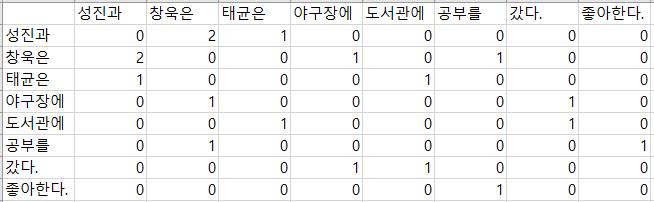

이렇게 만들어진 동시 출현 행렬을 토대로 특이값 분해 방법 등을 사용해 단어 벡터를 만들면 된다.
이러한 카운트 기반 방법의 장점은 우선 빠르다는 것이다. 적은 시간으로 단어 벡터를 만들 수 있다는 것이다.
데이터가 많을 경우 단어가 잘 표현되고 효율적이어서 아직까지도 맣이 사용하는 방법이다.

### 예측 방법(Predictive)

예측 기반 방법이란 신경망 구조 혹은 어떠한 모델을 사용해 특정 문맥에서 어떤 단어가 나올지를 예측하면서 단어를 벡터로 만드는 방식이다.
예측 방법에는 다음과 같은 것이 있다.


- Word2vec
- NNLM(Neural Network Language Model)
- RNNLM(Recurrent Neural Network Language Model)

가장 많이 사용되는 것은 Word2vec이다.
Word2vec은 CVOW(Continuous Bag of Words)와 Skip-Gram이라는 두가지 모델로 나뉜다.
두 모델은 각각 서로 반대되는 개념이다.

CBOW는 어떤 단어를 문맥 안의 주변 단어들을 통해 예측하는 방법이다.
Skip-Gram은 어떤 단어를 가지고 특정 문맥 안의 주변 단어들을 예측하는 방법이다.

예시를 들어 설명하자면

- 창욱은 냉장고에서 음식을 꺼내서 먹었다.

이때 CBOW는 주변 단어를 통해 하나의 단어를 예측하는 모델이다. 즉, 다음 문장의 빈칸을 채우는 모델이라 생각하면 된다.

- 창욱은 냉장고에서 ___ 꺼내서 먹었다.

반대로 Skip-Gram은 하나의 단어를 가지고 주변에 올 단어를 예측하는 모델이다. 다음 문장에서 빈칸을 채운다고 생각하면 된다.

- ___ _____ 음식을 ___ _____.

### CBOW
CBOW는 다음과 같은 순서로 학습한다.

1. 각 주변 단어들을 원-핫 벡터로 만들어 입력값으로 사용한다.(입력층 벡터)
2. 가중치 행렬(weight matrix)을 각 원-핫 벡터에 곱해서 n-차원 벡터를 만든다.(N-차원 은닉층)
3. 만들어진 n-차원 벡터를 모두 더한 후 개수로 나눠 평균 n-차원 벡터를 만든다. (출력층 벡터)
4. n-차원 벡터에 다시 가중치 행렬을 곱해서 원-핫 벡터와 같은 차원의 벡터로 만든다.
5. 만들어진 벡터를 실제 예측하려고 하는 단어의 원-핫 벡터와 비교해서 학습한다.

### Skip-Gram
Skip-Gram의 학습 방법도 비슷한 과정으로 진행한다.

1. 하나의 단어를 원-핫 벡터로 만들어서 입력값으로 사용한다.(입력층 벡터)
2. 가중치 행렬을 원-핫 벡터에 곱해서 n-차원 벡터를 만든다(N-차원 은닉층)
3. n-차원 벡터에 다시 가중치 행렬을 곱해서 원-핫 벡터와 같은 차원의 벡터로 만든다.(출력층 벡터)
4. 만들어진 벡터를 실제 예측하려는 주변 단어들 각각의 원-핫 벡터와 비교해서 학습한다.

두 모델의 학습과정은 확실한 차이점이 있다.
CBOW에서는 입력값으로 여러개의 단어를 사용하고, 학습을 위해 하나의 단어와 비교한다.
Skip-Gram에서는 입력값이 하나의 단어를 사용하교, 학습을 위해 주변의 여러 단어와 비교한다.

위의 학습과정을 모두 끝낸 후 가중치 행렬의 각 행을 단어 벡터로 사용한다.
이처럼 Word2Vec의 두 모델은 여러가지 장점이 있다.

기존의 카운트 기반 방법으로 만든 단어 벡터보다 단어 간의 유사도를 잘 측정한다.
또한 단어들의 복잡한 특징까지도 잘 잡아낸다.
마지막으로 이렇게 만들어진 단어 벡터는 서로에게 유의미한 관계를 측정할 수 있다.
예를들어 엄마,아빠,남자,여자를 word2vec방식을 사용해 단어 벡터로 만들면, '엄마'와 '아빠'라는 단어의 벡터 사이의 거리와 '여자'와 '남자'라는 단어의 벡터사이의 거리가 같게 나온다.

Word2vec의 모델 중 Skip-Gram이 성능이 좋아 일반적인 경우 Skip-Gram을 사용한다.
하지만 절대적으로 항상 좋은 것은 아니므로 두가지 모두 고려할만 하다.